In [11]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Cesta k priečinku so súbormi
FOLDER_PATH = "../.scratch/annotations"

In [13]:
# Funkcia na načítanie JSON súborov
def load_annotations(folder_path):
    data = []
    game_names = set()
    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as f:
                content = json.load(f)
                game_name = content.get("gameName", "Unknown Game")
                game_names.add(game_name)
                for annotation in content.get("annotations", []):
                    annotation["gameName"] = game_name
                    data.append(annotation)
    return pd.DataFrame(data), len(game_names)

In [14]:
# Načítanie dát
df, num_games = load_annotations(FOLDER_PATH)

In [15]:
# Konverzia času na sekundy
def time_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(":"))
    return minutes * 60 + seconds

df["time_seconds"] = df["gameTime"].apply(time_to_seconds)

In [16]:
# Základné štatistiky
print(df.groupby("label").size())

label
chance       300
no_chance    301
dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


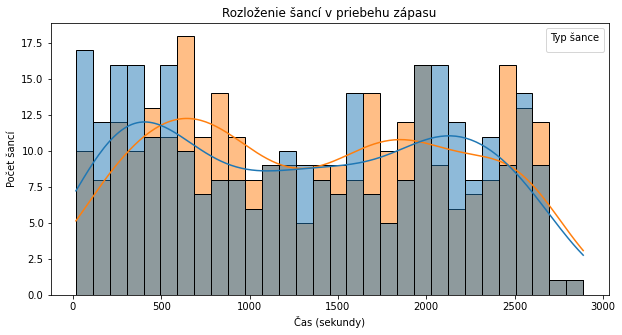

In [17]:
# Vizualizácia: Histogram rozloženia šancí v čase
plt.figure(figsize=(10, 5))
sns.histplot(df, x="time_seconds", hue="label", bins=30, kde=True)
plt.xlabel("Čas (sekundy)")
plt.ylabel("Počet šancí")
plt.title("Rozloženie šancí v priebehu zápasu")
plt.legend(title="Typ šance")
plt.show()

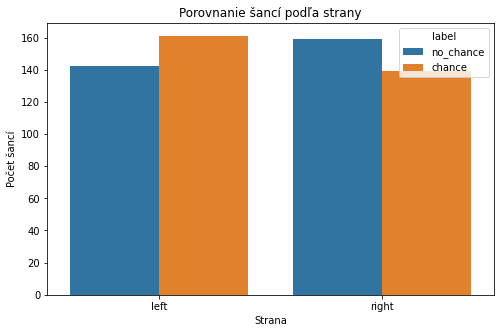

In [18]:
# Vizualizácia: Počet šancí podľa strany
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="side", hue="label")
plt.xlabel("Strana")
plt.ylabel("Počet šancí")
plt.title("Porovnanie šancí podľa strany")
plt.show()

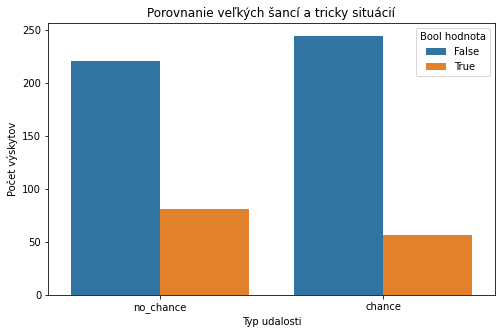

In [19]:
# Vizualizácia: Rozdelenie veľkých šancí (bool=True) vs. ostatných
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="label", hue="bool")
plt.xlabel("Typ udalosti")
plt.ylabel("Počet výskytov")
plt.title("Porovnanie veľkých šancí a tricky situácií")
plt.legend(title="Bool hodnota", labels=["False", "True"])
plt.show()